In [1]:
#Python Library for Dataframe usage
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Libraries for Graph
import networkx as nx
from src.communities.communities import find_communities_n, find_communities_modularity
from src.communities.communities import find_communities_modularities


In [2]:
#Serializing to a file
import _pickle as pickle

#Python Libraries for Mongos Database
import pymongo
from pymongo import MongoClient

In [3]:
#etc. 
from collections import Counter

In [4]:
from itertools import combinations

In [5]:
#PandaDF of ingredients and their associated flavor molecules
#Opening the pickled file
pickle_in = open("./data/ingredients/ingredient_only_pd.pickle", "rb")

#Getting the dictionary from the pickle
ingredient_only_pd = pickle.load(pickle_in)

In [6]:
#Opening the pickled file
pickle_in = open("./data/graph/molecule_full_graph.pickle", "rb")

#Getting the dictionary from the pickle
full_graph = pickle.load(pickle_in)

In [7]:
#Opening the pickled file
pickle_in = open("./data/graph/ingredient_full_graph.pickle", "rb")

#Getting the dictionary from the pickle
ingredient_full_graph = pickle.load(pickle_in)

In [8]:
#returns a dictionary based on attributes
ingredient_node_attribute = nx.get_node_attributes(full_graph, 'ingredient_node')
molecule_node_attribute = nx.get_node_attributes(full_graph, 'molecule_node')

In [9]:
#list of ingredients
ingredient_list = []
for node, boolean in ingredient_node_attribute.items():    
    if boolean == True:
        ingredient_list.append(node)

#list of non ingredients
molecule_list = []
for node, boolean in molecule_node_attribute.items():   
    if boolean == True:
        molecule_list.append(node)

# Ingredient-Molecule Data Frame

In [10]:
ingredient_only_pd.head()

,_id,category,flavor_of_molecules,ingredient,molecule_IDs,molecules,set_molecules,set_molecules_ID,molecule_quantity
0,5ca27b8f13218a1eabac63d6,Animal Product,"[[faint], [very strong, mothball, animal, f...",egg,"[6322, 6736, 31252, 7909, 7284, 7501, 9609, 12...","[L-arginine, 3-Methylindole, 2,5-Dimethylpyraz...","{l-Menthol, 1-Octen-3-Ol, dimethyl sulfide, 3-...","{379, 878, 18827, 31289, 11552, 12232, 454, 62...",55
9,5ca27b9b13218a1eabac63df,Beverage Alcoholic,"[[caramellic, spicy], [hop_oil, apricot, wh...",beer,"[5367531, 7795, 20083, 10558, 16617, 12209, 22...","[(2E,4E)-Undeca-2,4-dienal, Isoamyl butyrate, ...","{Ethyl trans-4-decenoate, Isopropyl Acetate, E...","{379, 8468, 61048, 31289, 7361, 1146, 6202, 89...",263
11,5ca27b9d13218a1eabac63e1,Beverage Alcoholic,"[[fragrant, bread, woody, sweet, baked, a...",brandy,"[7362, 20653, 5364399, 61386, 12327, 7762, 805...","[2-Furaldehyde, 2-Methylhexanoic Acid, Ethyl 2...","{Propyl Formate, 3-Acetylpyridine, 4-Methyl-5-...","{379, 8468, 9256, 460, 7361, 8091, 8073, 8025,...",50
13,5ca27ba013218a1eabac63e3,Beverage Alcoholic,"[[fragrant, bread, woody, sweet, baked, a...",apple brandy,"[7362, 20653, 5364399, 61386, 9862, 7775, 1661...","[2-Furaldehyde, 2-Methylhexanoic Acid, Ethyl 2...","{Diethyl Malonate, Isobutyl hexanoate, Propyl ...","{379, 8468, 9256, 460, 7361, 10885, 8091, 8073...",74
15,5ca27ba313218a1eabac63e5,Beverage Alcoholic,"[[fragrant, bread, woody, sweet, baked, a...",blackberry brandy,"[7362, 20653, 5364399, 61386, 12327, 7762, 805...","[2-Furaldehyde, 2-Methylhexanoic Acid, Ethyl 2...","{Propyl Formate, 3-Acetylpyridine, 4-Methyl-5-...","{379, 8468, 9256, 460, 7361, 177, 8091, 8073, ...",51


In [11]:
list_of_categories = ingredient_only_pd["category"].unique()
print("List of catgories of food: ", list_of_categories)

List of catgories of food:  ['Animal Product' 'Beverage Alcoholic' 'Beverage Caffeinated' 'Cereal'
 'Maize' 'Dairy' 'Essential Oil' 'Seafood' 'Fish' 'Flower' 'Fruit' 'Berry'
 'Fruit Citrus' 'Fruit Essence' 'Fungus' 'Herb' 'Meat' 'Nut' 'Seed'
 'Legume' 'Plant' 'Plant Derivative' 'Spice' 'Vegetable' 'Gourd'
 'Vegetable Root' 'Vegetable Stem' 'Vegetable Tuber' 'Cabbage' 'Additive']


In [12]:
print("number of ingredients: ", len(ingredient_only_pd["ingredient"]))

number of ingredients:  268


In [13]:
print("number of possible combinations: ", 268 * 267)

number of possible combinations:  71556


In [14]:
print("number of molecules: ", len(molecule_list))

number of molecules:  1467


In [15]:
ingredient_only_pd["molecule_quantity"].describe()

count    268.000000
mean      98.694030
std       76.326004
min        1.000000
25%       20.750000
50%      102.500000
75%      149.000000
max      391.000000
Name: molecule_quantity, dtype: float64

(array([86., 19., 50., 53., 32., 16.,  9.,  2.,  0.,  1.]),
 array([  1.,  40.,  79., 118., 157., 196., 235., 274., 313., 352., 391.]),
 <a list of 10 Patch objects>)

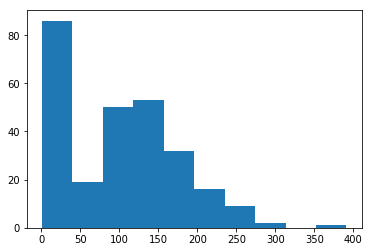

In [16]:
plt.hist(ingredient_only_pd["molecule_quantity"])

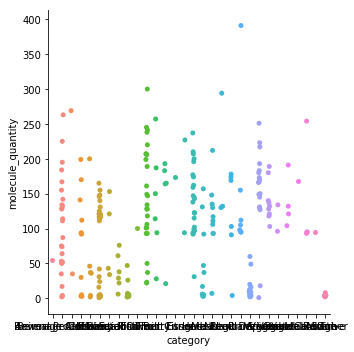

In [17]:
sns.catplot(x = "category", y = "molecule_quantity", data = ingredient_only_pd)

# Graphs

# Ingredient Only Graphs

In [18]:
#Opening the pickled file for full graph
pickle_in = open("./data/graph/ingredient_subset_graph.pickle","rb")
ing_graph = pickle.load(pickle_in)

/home/ryoiwata/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


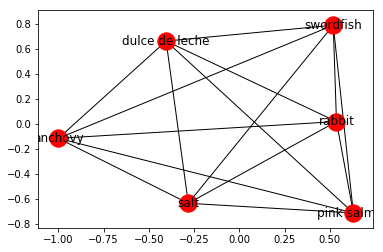

In [19]:
nx.draw_networkx(ing_graph)

In [10]:
from src.all_functions import graph_based_on_shared_molecule_creator

In [11]:
my_graph = graph_based_on_shared_molecule_creator(ingredient_only_pd, create_file= False)

In [12]:
my_graph.number_of_nodes()

267

In [13]:
my_graph.number_of_edges()

9566

In [14]:
comms, mods = find_communities_modularities(ingredient_full_graph)

Iteration:  1
Cut of Girvan Newman:  1
Cut of Girvan Newman:  2
Cut of Girvan Newman:  3
Cut of Girvan Newman:  4
Cut of Girvan Newman:  5
Cut of Girvan Newman:  6
Cut of Girvan Newman:  7
Cut of Girvan Newman:  8
Iteration:  2
Cut of Girvan Newman:  1
Cut of Girvan Newman:  2
Cut of Girvan Newman:  3
Cut of Girvan Newman:  4
Cut of Girvan Newman:  5
Cut of Girvan Newman:  6
Cut of Girvan Newman:  7
Cut of Girvan Newman:  8
Cut of Girvan Newman:  9
Iteration:  3
Cut of Girvan Newman:  1
Cut of Girvan Newman:  2
Cut of Girvan Newman:  3
Cut of Girvan Newman:  4
Cut of Girvan Newman:  5
Cut of Girvan Newman:  6
Cut of Girvan Newman:  7
Cut of Girvan Newman:  8
Cut of Girvan Newman:  9
Cut of Girvan Newman:  10
Iteration:  4
Cut of Girvan Newman:  1
Cut of Girvan Newman:  2
Cut of Girvan Newman:  3
Cut of Girvan Newman:  4


KeyboardInterrupt: 

In [ ]:
plt.plot(list(range(1,len(mods)+1)), mods, ':o')
plt.xlabel('number of communities')
plt.ylabel('modularity')

# Ingredient and Molecule Graph

In [20]:
#Opening the pickled file for full graph
pickle_in = open("./data/graph/molecule_subset_graph.pickle","rb")
mol_graph = pickle.load(pickle_in)

/home/ryoiwata/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


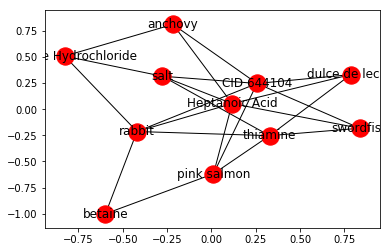

In [21]:
nx.draw_networkx(mol_graph)

In [22]:
degree_dict = dict(full_graph.degree())
degree_series = pd.Series(degree_dict)
degree_series.describe()

count    1734.000000
mean       30.355248
std        52.620840
min         1.000000
25%         2.000000
50%         5.000000
75%        26.000000
max       391.000000
dtype: float64

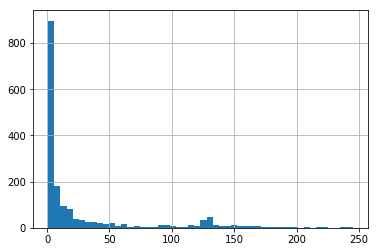

In [23]:
degree_series[degree_series < 250].hist(bins=50)

In [24]:
ingredient_centrality = []
for tup in Counter(nx.degree_centrality(full_graph)).most_common():
    if tup[0] in ingredient_list:
        ingredient_centrality.append(tup)
print("Ingredients with highest centrality: ")
print(ingredient_centrality)

Ingredients with highest centrality: 
[('tea', 0.22562031159838428), ('apple', 0.17311021350259664), ('cocoa', 0.16964800923254472), ('coffee', 0.1552221581073283), ('beer', 0.1517599538372764), ('strawberry', 0.14829774956722447), ('potato', 0.1465666474321985), ('ginger', 0.14425851125216388), ('orange', 0.1413733410271206), ('papaya', 0.13906520484708598), ('mango', 0.13733410271206), ('spearmint', 0.1361800346220427), ('mushroom', 0.1309867282169648), ('white wine', 0.12983266012694747), ('pepper', 0.12810155799192152), ('pineapple', 0.12694748990190421), ('celery', 0.12521638776687824), ('peanut', 0.12233121754183496), ('basil', 0.120600115406809), ('apricot', 0.11944604731679168), ('melon', 0.11944604731679168), ('banana', 0.11886901327178302), ('rosemary', 0.11886901327178302), ('corn', 0.1154068090017311), ('dill', 0.1154068090017311), ('rice', 0.11482977495672243), ('peach', 0.11482977495672243), ('coriander', 0.11309867282169647), ('rum', 0.11252163877668782), ('lemon', 0.111

In [25]:
molecule_centrality = []
for tup in Counter(nx.degree_centrality(full_graph)).most_common():
    if tup[0] in molecule_list:
        molecule_centrality.append(tup)
print("Molecules with highest centrality: ")
print(molecule_centrality)


Molecules with highest centrality: 
[('CID 644104', 0.11713791113675706), ('Heptanoic Acid', 0.10790536641661858), ('thiamine', 0.10732833237160992), ('Isobutyraldehyde', 0.10213502596653203), ('2-Phenylethanol', 0.10155799192152336), ('3-Methyl-1-butanol', 0.09809578765147144), ('3-Methylbutanal', 0.09578765147143681), ('Phenethyl acetate', 0.09521061742642815), ('phenylacetaldehyde', 0.0946335833814195), ('Octanal', 0.09290248124639353), ('4-hydroxybenzaldehyde', 0.09290248124639353), ('2,3-butanedione', 0.09290248124639353), ('Propionaldehyde', 0.09174841315637622), ('indole', 0.09117137911136756), ('betaine', 0.09117137911136756), ('3-methylthiopropanol', 0.09001731102135026), ('methanethiol', 0.0894402769763416), ('Hexanal', 0.0894402769763416), ('2-Methylbutyraldehyde', 0.08886324293133294), ('salicylic acid', 0.08770917484131563), ('3-(Methylthio)propionaldehyde', 0.08655510675129832), ('vanillin', 0.08655510675129832), ('cis-3-Hexenyl acetate', 0.08482400461627236), ('2-Butanon

In [26]:
print("Connected components: ", nx.number_connected_components(full_graph))

Connected components:  1


In [26]:
nx.degree_centrality(full_graph)

{'egg': 0.031736872475476054,
 'Pyridine': 0.02538949798038084,
 'lactic acid': 0.025966532025389497,
 'isopropanol': 0.030005770340450086,
 'thiamine': 0.10732833237160992,
 'CID 644104': 0.11713791113675706,
 'L-arginine': 0.009809578765147143,
 '50-69-1': 0.004039238315060588,
 'l-Menthol': 0.01269474899019042,
 '2-Methylpyrazine': 0.015579919215233698,
 '4-Methyl-2-pentanone': 0.020196191575302943,
 '2,3-Pentanedione': 0.02423542989036353,
 'Pyrazine': 0.016733987305251007,
 'P-Cresol': 0.010386612810155798,
 'Octan-2-one': 0.035776110790536636,
 'Pyrrole': 0.008078476630121177,
 'dimethyl sulfide': 0.0363531448355453,
 '3-(Methylthio)propionaldehyde': 0.08655510675129832,
 '4-Methylthiazole': 0.004616272360069244,
 '3-Methylindole': 0.0075014425851125215,
 '3-Methylbutanal': 0.09578765147143681,
 'Thiamine Hydrochloride': 0.07328332371609925,
 'indole': 0.09117137911136756,
 '2-Pentanone': 0.030005770340450086,
 'betaine': 0.09117137911136756,
 '2-Pentylfuran': 0.02481246393537218

In [27]:
nx.betweenness_centrality(full_graph)

KeyboardInterrupt: 

# Common Pairing Shared Molecule Ratios

In [27]:
from src.all_functions import common_pair_analysis

In [34]:
list_of_category_ratios = []
for category in list_of_categories:
    if len(ingredient_only_pd[ingredient_only_pd["category"] == category]["ingredient"]) > 1:
        list_of_ingredients_per_category = ingredient_only_pd[ingredient_only_pd["category"] == category]["ingredient"].tolist()
        ratio_total = 0
        for combo in combinations(list_of_ingredients_per_category, 2):
            ratio, x, y, z = common_pair_analysis(combo[0], combo[1])
            ratio_total += ratio
        category_ratio = ratio_total / len(list(combinations(list_of_ingredients_per_category, 2)))
        list_of_category_ratios.append(category_ratio)
        print("Ratio for {}: ".format(category), category_ratio)

Ratio for Beverage Alcoholic:  0.2760335979265801
Ratio for Beverage Caffeinated:  0.030508474576271188
Ratio for Cereal:  0.29510614309972283
Ratio for Maize:  0.08685947094578159
Ratio for Dairy:  0.28742744731047254
Ratio for Essential Oil:  0.1404912865812022
Ratio for Seafood:  0.16144490977143952
Ratio for Fish:  0.41460354837905844
Ratio for Fruit:  0.3786900657335132
Ratio for Berry:  0.35719197257990054
Ratio for Fruit Citrus:  0.3884684724638544
Ratio for Fungus:  0.41409691629955947
Ratio for Herb:  0.5326167800571301
Ratio for Meat:  0.13390955730473256
Ratio for Nut:  0.5507713353522316
Ratio for Seed:  0.44668430377252716
Ratio for Legume:  0.33408988143315316
Ratio for Plant:  0.6316625305314607
Ratio for Plant Derivative:  0.09379168158647629
Ratio for Spice:  0.4443326703423937
Ratio for Vegetable:  0.5939392378952064
Ratio for Gourd:  0.7037037037037037
Ratio for Vegetable Root:  0.6347922930979436
Ratio for Vegetable Tuber:  0.6709070924558994
Ratio for Additive:  0.

In [35]:
list_of_category_ratios

[0.2760335979265801,
 0.030508474576271188,
 0.29510614309972283,
 0.08685947094578159,
 0.28742744731047254,
 0.1404912865812022,
 0.16144490977143952,
 0.41460354837905844,
 0.3786900657335132,
 0.35719197257990054,
 0.3884684724638544,
 0.41409691629955947,
 0.5326167800571301,
 0.13390955730473256,
 0.5507713353522316,
 0.44668430377252716,
 0.33408988143315316,
 0.6316625305314607,
 0.09379168158647629,
 0.4443326703423937,
 0.5939392378952064,
 0.7037037037037037,
 0.6347922930979436,
 0.6709070924558994,
 0.6780952380952381]

Ratio for Beverage Alcoholic:  0.2760335979265801
Ratio for Beverage Caffeinated:  0.030508474576271188
Ratio for Cereal:  0.29510614309972283
Ratio for Maize:  0.08685947094578159
Ratio for Dairy:  0.28742744731047254
Ratio for Essential Oil:  0.1404912865812022
Ratio for Seafood:  0.16144490977143952
Ratio for Fish:  0.41460354837905844
Ratio for Fruit:  0.3786900657335132
Ratio for Berry:  0.35719197257990054
Ratio for Fruit Citrus:  0.3884684724638544
Ratio for Fungus:  0.41409691629955947
Ratio for Herb:  0.5326167800571301
Ratio for Meat:  0.13390955730473256
Ratio for Nut:  0.5507713353522316
Ratio for Seed:  0.44668430377252716
Ratio for Legume:  0.33408988143315316
Ratio for Plant:  0.6316625305314607
Ratio for Plant Derivative:  0.09379168158647629
Ratio for Spice:  0.4443326703423937
Ratio for Vegetable:  0.5939392378952064
Ratio for Gourd:  0.7037037037037037
Ratio for Vegetable Root:  0.6347922930979436
Ratio for Vegetable Tuber:  0.6709070924558994
Ratio for Additive:  0.6780952380952381

In [60]:
list_of_ingredients_per_category = ingredient_only_pd[ingredient_only_pd["category"] == category]["ingredient"].tolist()
ratio_total = 0
for combo in combinations(list_of_ingredients_per_category, 2):
    ratio, x, y, z = common_pair_analysis(combo[0], combo[1])
    ratio_total += ratio
print(ratio_total / len(list(combinations(list_of_ingredients_per_category, 2))))

0.4443326703423937


number of shared molecules:  56
number of unique molecules to milk:  213
number of unique molecules to coffee:  55
ratio of shared to total:  0.1728395061728395


(0.1728395061728395, 213, 55, 56)

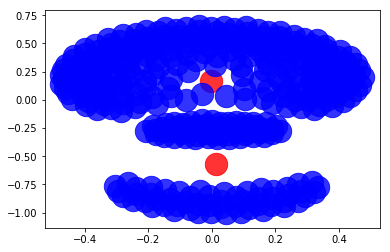

In [30]:
common_pair_analysis("milk", "coffee", True, True)

number of shared molecules:  1
number of unique molecules to celery:  8
number of unique molecules to peanut butter:  216
ratio of shared to total:  0.0044444444444444444


(0.0044444444444444444, 8, 216, 1)

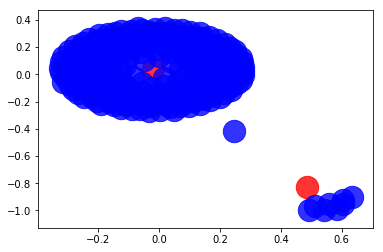

In [31]:
common_pair_analysis("celery", "peanut butter", True, True)

number of shared molecules:  17
number of unique molecules to cherry tomato:  103
number of unique molecules to mozzarella cheese:  77
ratio of shared to total:  0.08629441624365482


(0.08629441624365482, 103, 77, 17)

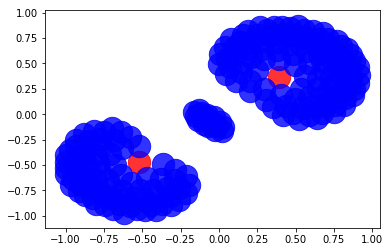

In [32]:
common_pair_analysis("cherry tomato", "mozzarella cheese", True, True)

number of shared molecules:  4
number of unique molecules to ketchup:  265
number of unique molecules to coffee:  1
ratio of shared to total:  0.014814814814814815


(0.014814814814814815, 265, 1, 4)

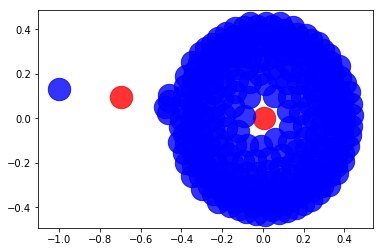

In [33]:
common_pair_analysis("ketchup", "coffee", True, True)

In [34]:
list(ingredient_only_pd["ingredient"])

['egg',
 'beer',
 'brandy',
 'apple brandy',
 'blackberry brandy',
 'cherry brandy',
 'pear brandy',
 'plum brandy',
 'raspberry brandy',
 'weinbrand brandy',
 'gin',
 'rum',
 'bourbon whisky',
 'japanese whisky',
 'wine',
 'champagne',
 'cider',
 'plum wine',
 'port wine',
 'red wine',
 'rose wine',
 'sake',
 'sherry',
 'strawberry wine',
 'white wine',
 'coffee',
 'green tea',
 'barley',
 'oats',
 'rice',
 'corn',
 'corn oil',
 'popcorn',
 'sweetcorn',
 'butter',
 'buttermilk',
 'cheese',
 'blue cheese',
 'cheddar cheese',
 'cottage cheese',
 'cream cheese',
 'feta cheese',
 'goat cheese',
 'gruyere cheese',
 'mozzarella cheese',
 'parmesan cheese',
 'provolone cheese',
 'romano cheese',
 'roquefort cheese',
 'swiss cheese',
 'ghee',
 'milk',
 'goat milk',
 'milk powder',
 'skimmed milk',
 'yogurt',
 'lemon grass',
 'orange oil',
 'clary sage',
 'clam',
 'crab',
 'lobster',
 'oyster',
 'shrimp',
 'caviar',
 'codfish',
 'fish',
 'salmon',
 'artichoke',
 'apple',
 'apricot',
 'avocado'

# Recommender

In [35]:
from src.recommender.lists_walk_recommender import random_walk_jacaard_lists

/home/ryoiwata/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


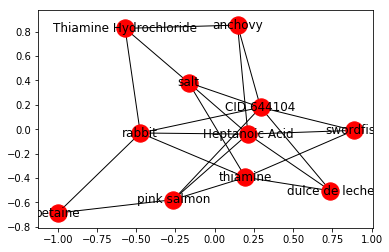

In [36]:

nx.draw_networkx(mol_graph)

In [37]:
ingredient_1 = "mozzarella cheese"
iterations = 10000
steps = 10
return_prob = 0.001
print(random_walk_jacaard_lists(ingredient_1, iterations, steps, return_prob))

Counter({'tea': 154, 'coffee': 117, 'apple': 111, 'cocoa': 110, 'orange': 109, 'mango': 106, 'rum': 100, 'beer': 99, 'papaya': 94, 'potato': 93, 'mushroom': 91, 'strawberry': 89, 'ginger': 88, 'peanut': 87, 'carrot': 85, 'spearmint': 85, 'pepper': 82, 'rosemary': 82, 'beans': 79, 'raspberry': 78, 'vanilla': 78, 'mozzarella cheese': 78, 'corn': 78, 'white wine': 77, 'onion': 76, 'basil': 76, 'lemon': 75, 'pineapple': 75, 'apricot': 75, 'rice': 75, 'peach': 74, 'parmesan cheese': 74, 'lemon balm': 74, 'red wine': 72, 'strawberry wine': 72, 'banana': 71, 'gruyere cheese': 70, 'melon': 69, 'cardamom': 69, 'sherry': 68, 'marjoram': 68, 'coriander': 68, 'cheddar cheese': 68, 'olive': 67, 'green beans': 67, 'celery': 67, 'pear': 67, 'wine': 66, 'pork': 66, 'grapefruit': 65, 'lima beans': 65, 'allspice': 65, 'thyme': 64, 'oregano': 64, 'pomegranate': 64, 'blue cheese': 64, 'coconut': 62, 'parsley': 61, 'nutmeg': 60, 'port wine': 60, 'plum': 60, 'romano cheese': 59, 'champagne': 59, 'chicken': 

In [38]:
ingredient_1 = "crab"
iterations = 10000
steps = 10
return_prob = 0.001
print(random_walk_jacaard_lists(ingredient_1, iterations, steps, return_prob))

Counter({'tea': 136, 'apple': 132, 'cocoa': 121, 'coffee': 111, 'strawberry': 110, 'papaya': 104, 'potato': 103, 'spearmint': 100, 'mango': 99, 'mushroom': 97, 'ginger': 96, 'white wine': 93, 'pepper': 91, 'pineapple': 91, 'banana': 90, 'melon': 89, 'plum': 88, 'beer': 88, 'orange': 87, 'peanut': 82, 'rum': 82, 'vanilla': 81, 'raspberry': 80, 'cinnamon': 79, 'parmesan cheese': 78, 'onion': 78, 'green beans': 77, 'rice': 77, 'celery': 76, 'carrot': 75, 'red wine': 75, 'apricot': 74, 'corn': 73, 'dill': 73, 'rosemary': 73, 'mint': 71, 'lemon': 71, 'oregano': 70, 'peach': 70, 'wine': 70, 'sherry': 67, 'mandarin orange': 67, 'asparagus': 66, 'coconut': 66, 'port wine': 66, 'lima beans': 66, 'coriander': 65, 'basil': 65, 'marjoram': 65, 'pecans': 64, 'allspice': 63, 'garlic': 63, 'oats': 63, 'cardamom': 62, 'star anise': 62, 'beans': 62, 'blackberry': 62, 'sage': 62, 'lettuce': 61, 'olive': 61, 'blue cheese': 61, 'fennel': 61, 'pork': 60, 'parsley': 60, 'peas': 60, 'sesame': 59, 'plum wine'

In [39]:
ingredient_1 = "beer"
iterations = 10000
steps = 10
return_prob = 0.001
print(random_walk_jacaard_lists(ingredient_1, iterations, steps, return_prob))

Counter({'tea': 142, 'apple': 123, 'beer': 110, 'cocoa': 106, 'mushroom': 103, 'peanut': 102, 'mango': 102, 'papaya': 99, 'coffee': 97, 'white wine': 97, 'strawberry': 95, 'spearmint': 95, 'ginger': 92, 'potato': 90, 'pineapple': 86, 'peach': 83, 'orange': 83, 'pepper': 82, 'banana': 80, 'cinnamon': 79, 'melon': 78, 'coriander': 78, 'rice': 77, 'grapefruit': 75, 'lemon balm': 74, 'plum': 74, 'red wine': 74, 'rosemary': 74, 'oregano': 73, 'port wine': 73, 'leek': 73, 'spinach': 71, 'apricot': 70, 'asparagus': 70, 'lemon': 70, 'parmesan cheese': 70, 'dill': 69, 'blue cheese': 69, 'rum': 68, 'lima beans': 68, 'cardamom': 68, 'peas': 67, 'green beans': 67, 'pork': 67, 'coconut': 66, 'barley': 65, 'mandarin orange': 65, 'beans': 65, 'nutmeg': 65, 'onion': 65, 'basil': 64, 'lime': 64, 'bourbon whisky': 63, 'mint': 63, 'strawberry wine': 63, 'blackberry': 62, 'tarragon': 62, 'vanilla': 62, 'plum wine': 62, 'turmeric': 62, 'wine': 61, 'corn': 61, 'marjoram': 61, 'thyme': 61, 'cucumber': 61, 'c

# Recipe Based Graph

In [40]:
#accessing mongoDB
client = MongoClient()
database = client['food_map']   # Database name (to connect to)
collections = database['recipe']

#Getting the dataset from MongoDB into Pandas
recipe_puppy_pandas = pd.DataFrame(list(collections.find()))

In [41]:
recipe_puppy_pandas.shape

(172942, 5)

In [42]:
recipe_puppy_pandas.head()

,_id,recipe_ingredients,recipe_link,recipe_name,searched_ingredient
0,5caa762213218a112b0b979f,"[dashi, egg, egg noodles, mushroom, salt, seas...",http://www.grouprecipes.com/31653/egg-noodles-...,Egg Noodles With Wonton Egg And Veggie Recipe,egg
1,5caa762213218a112b0b97a0,"[egg, water]",http://www.recipezaar.com/Egg-Peeling-for-Egg-...,Egg Peeling for Egg Salad,egg
2,5caa762213218a112b0b97a1,"[black pepper, celery, cucumber, curry powder,...",http://www.recipezaar.com/Curried-Egg-Salad-on...,Curried Egg Salad on a Bed of Greens -- an Egg...,egg
3,5caa762213218a112b0b97a2,"[baking powder, butter, egg, green onion, rame...",http://www.recipezaar.com/Ramen-Noodle-Egg-Foo...,Ramen Noodle Egg Foo Yung,egg
4,5caa762213218a112b0b97a3,"[bacon, black pepper, cheese, egg, salt]",http://www.recipezaar.com/Bacon-and-Egg-Cups-1...,Bacon and Egg Cups,egg


In [43]:
#Opening the pickled file
#Needs to be opened in the recommender folder
pickle_in = open("./data/graph/recipe_graph.pickle","rb")

#Getting the dictionary from the pickle
recipe_full_graph = pickle.load(pickle_in)

In [45]:
print("number of ingredients: ", recipe_full_graph.number_of_nodes())

number of ingredients:  1664


In [47]:
print("number of edges: ", recipe_full_graph.number_of_edges())

number of edges:  194682


In [48]:
#Opening the pickled file
#Needs to be opened in the recommender folder
pickle_in = open("./data/graph/recipe_subset_graph.pickle","rb")

#Getting the dictionary from the pickle
recipe_subset_graph = pickle.load(pickle_in)

/home/ryoiwata/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


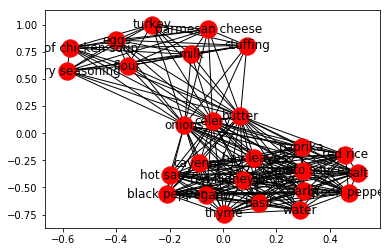

In [49]:

nx.draw_networkx(recipe_subset_graph)

In [50]:
print("recipe name: Turkey Stuffing Casserole, New Orleans Red Beans And Rice Recipe")

recipe name: Turkey Stuffing Casserole, New Orleans Red Beans And Rice Recipe


# Recipe Based Recommender

In [51]:
from src.recommender.recipe_walk_recommender import recipe_random_walk

In [52]:
ingredient_1 = "egg"
iterations = 10000
steps = 10
return_prob = 0.001
print(recipe_random_walk(ingredient_1, iterations, steps, return_prob))

Counter({'flour': 44, 'black pepper': 40, 'water': 40, 'celery': 39, 'milk': 38, 'olive oil': 37, 'sugar': 36, 'cilantro': 34, 'butter': 34, 'rice': 33, 'garlic': 33, 'lemon juice': 32, 'salt': 32, 'vegetable oil': 32, 'red pepper': 31, 'heavy cream': 30, 'onions': 30, 'lime juice': 30, 'coriander': 29, 'red onions': 29, 'honey': 29, 'basil': 29, 'walnut': 29, 'vegetable broth': 28, 'egg yolks': 28, 'vanilla extract': 28, 'parsley': 28, 'almonds': 28, 'cinnamon': 28, 'chicken broth': 27, 'sage': 27, 'orange zest': 27, 'margarine': 27, 'brown sugar': 27, 'egg whites': 27, 'spinach': 27, 'cream': 26, 'thyme': 26, 'green pepper': 26, 'carrot': 26, 'sea salt': 26, 'bread': 25, 'curry powder': 25, 'mint': 25, 'shrimp': 25, 'cloves': 24, 'lemon': 24, 'ginger': 24, 'eggs': 24, 'yogurt': 24, 'cornstarch': 24, 'sour cream': 23, 'cardamom': 23, 'green onion': 23, 'nonstick cooking spray': 23, 'chicken': 23, 'madeira wine': 23, 'lemon zest': 23, 'oregano': 23, 'nutmeg': 23, 'mayonnaise': 22, 'whi